In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Upload Your Dataset
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)  # For Excel: pd.read_excel(file_name)

Saving cleaned_promoter_data.csv to cleaned_promoter_data.csv


In [4]:
print(f" Dataset loaded: {file_name}")
print(f"Shape: {df.shape} rows, columns")

print("\n First 5 rows:")
display(df.head())

print("\n Dataset Info:")
df.info()  # Shows data types and missing values

print("\n Basic Statistics:")
display(df.describe(include='all'))  # For ALL columns


 Dataset loaded: cleaned_promoter_data.csv
Shape: (60000, 3) rows, columns

 First 5 rows:


,label,sequence,seq_length
0,1,CTGTCCAATCATAAGCCTCACGTGACCTGCCGCGTAGGGAGGGCAC...,301
1,1,CCTTATTATACCTGTAAACTATTCTCTTCCTTTGTTACTTGCTTTT...,301
2,1,TTTGCCACACTGCAGCATTAGGATGGGACTTCTCTTCCTGTTCCTG...,301
3,1,ACAAATAACAAAGATAGTTTTAGTAGATTATATCTGGGCTGTAGTG...,301
4,1,GAGGAGAAATTGGAGACAACCTCCTCCCACAATCCTCCGCGGCTCA...,301



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       60000 non-null  int64 
 1   sequence    60000 non-null  object
 2   seq_length  60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB

 Basic Statistics:


,label,sequence,seq_length
count,60000.000000,60000,60000.000000
unique,NaN,59929,NaN
top,NaN,TCCCCTTGGCGAGGGTTTGGCATGAAATCAATGGCCAGCAAGCTTG...,NaN
freq,NaN,4,NaN
mean,0.500000,NaN,276.000000
std,0.500004,NaN,25.000208
min,0.000000,NaN,251.000000
25%,0.000000,NaN,251.000000
50%,0.500000,NaN,276.000000
75%,1.000000,NaN,301.000000



 Missing Values:
Series([], dtype: int64)


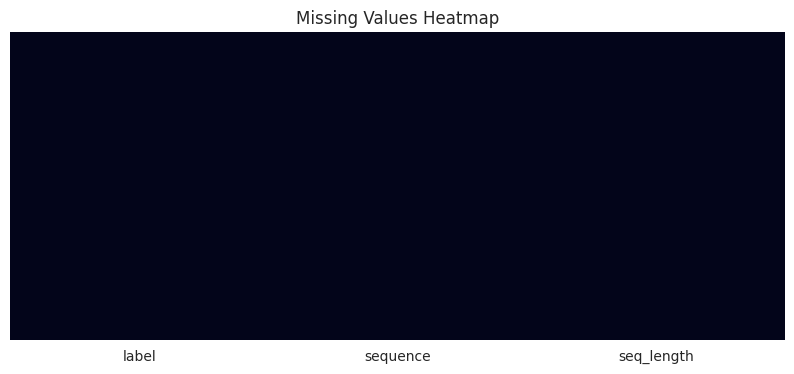

In [5]:
# Missing Values Analysis (with visualization)
print("\n Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

# Visualize missingness
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


📈 Distribution of Numeric Features:


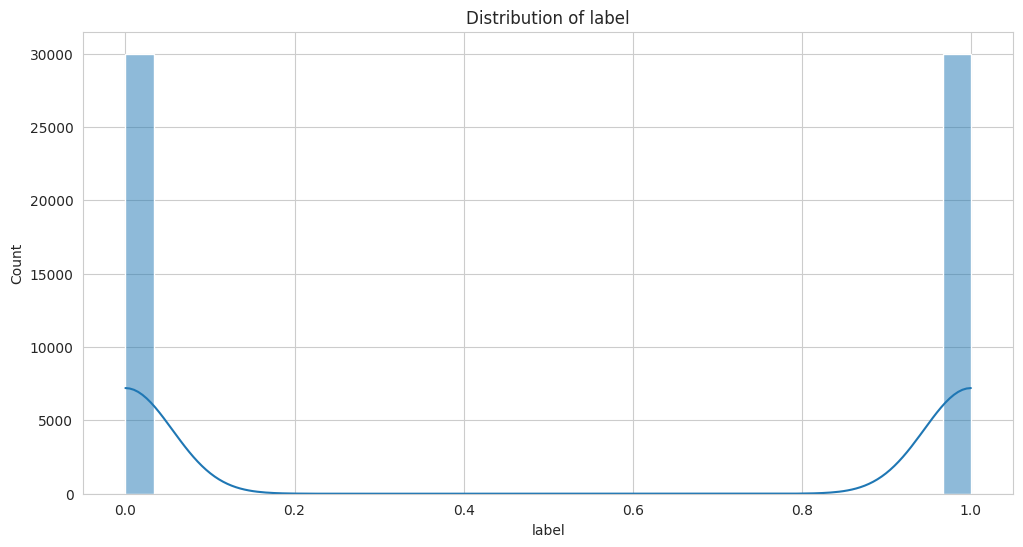

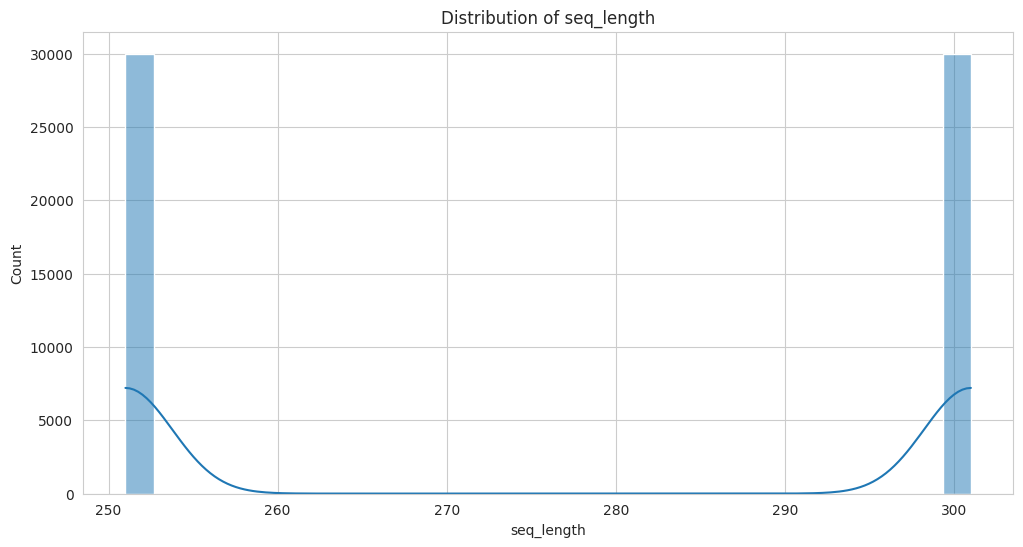


 Count of Categorical Values:


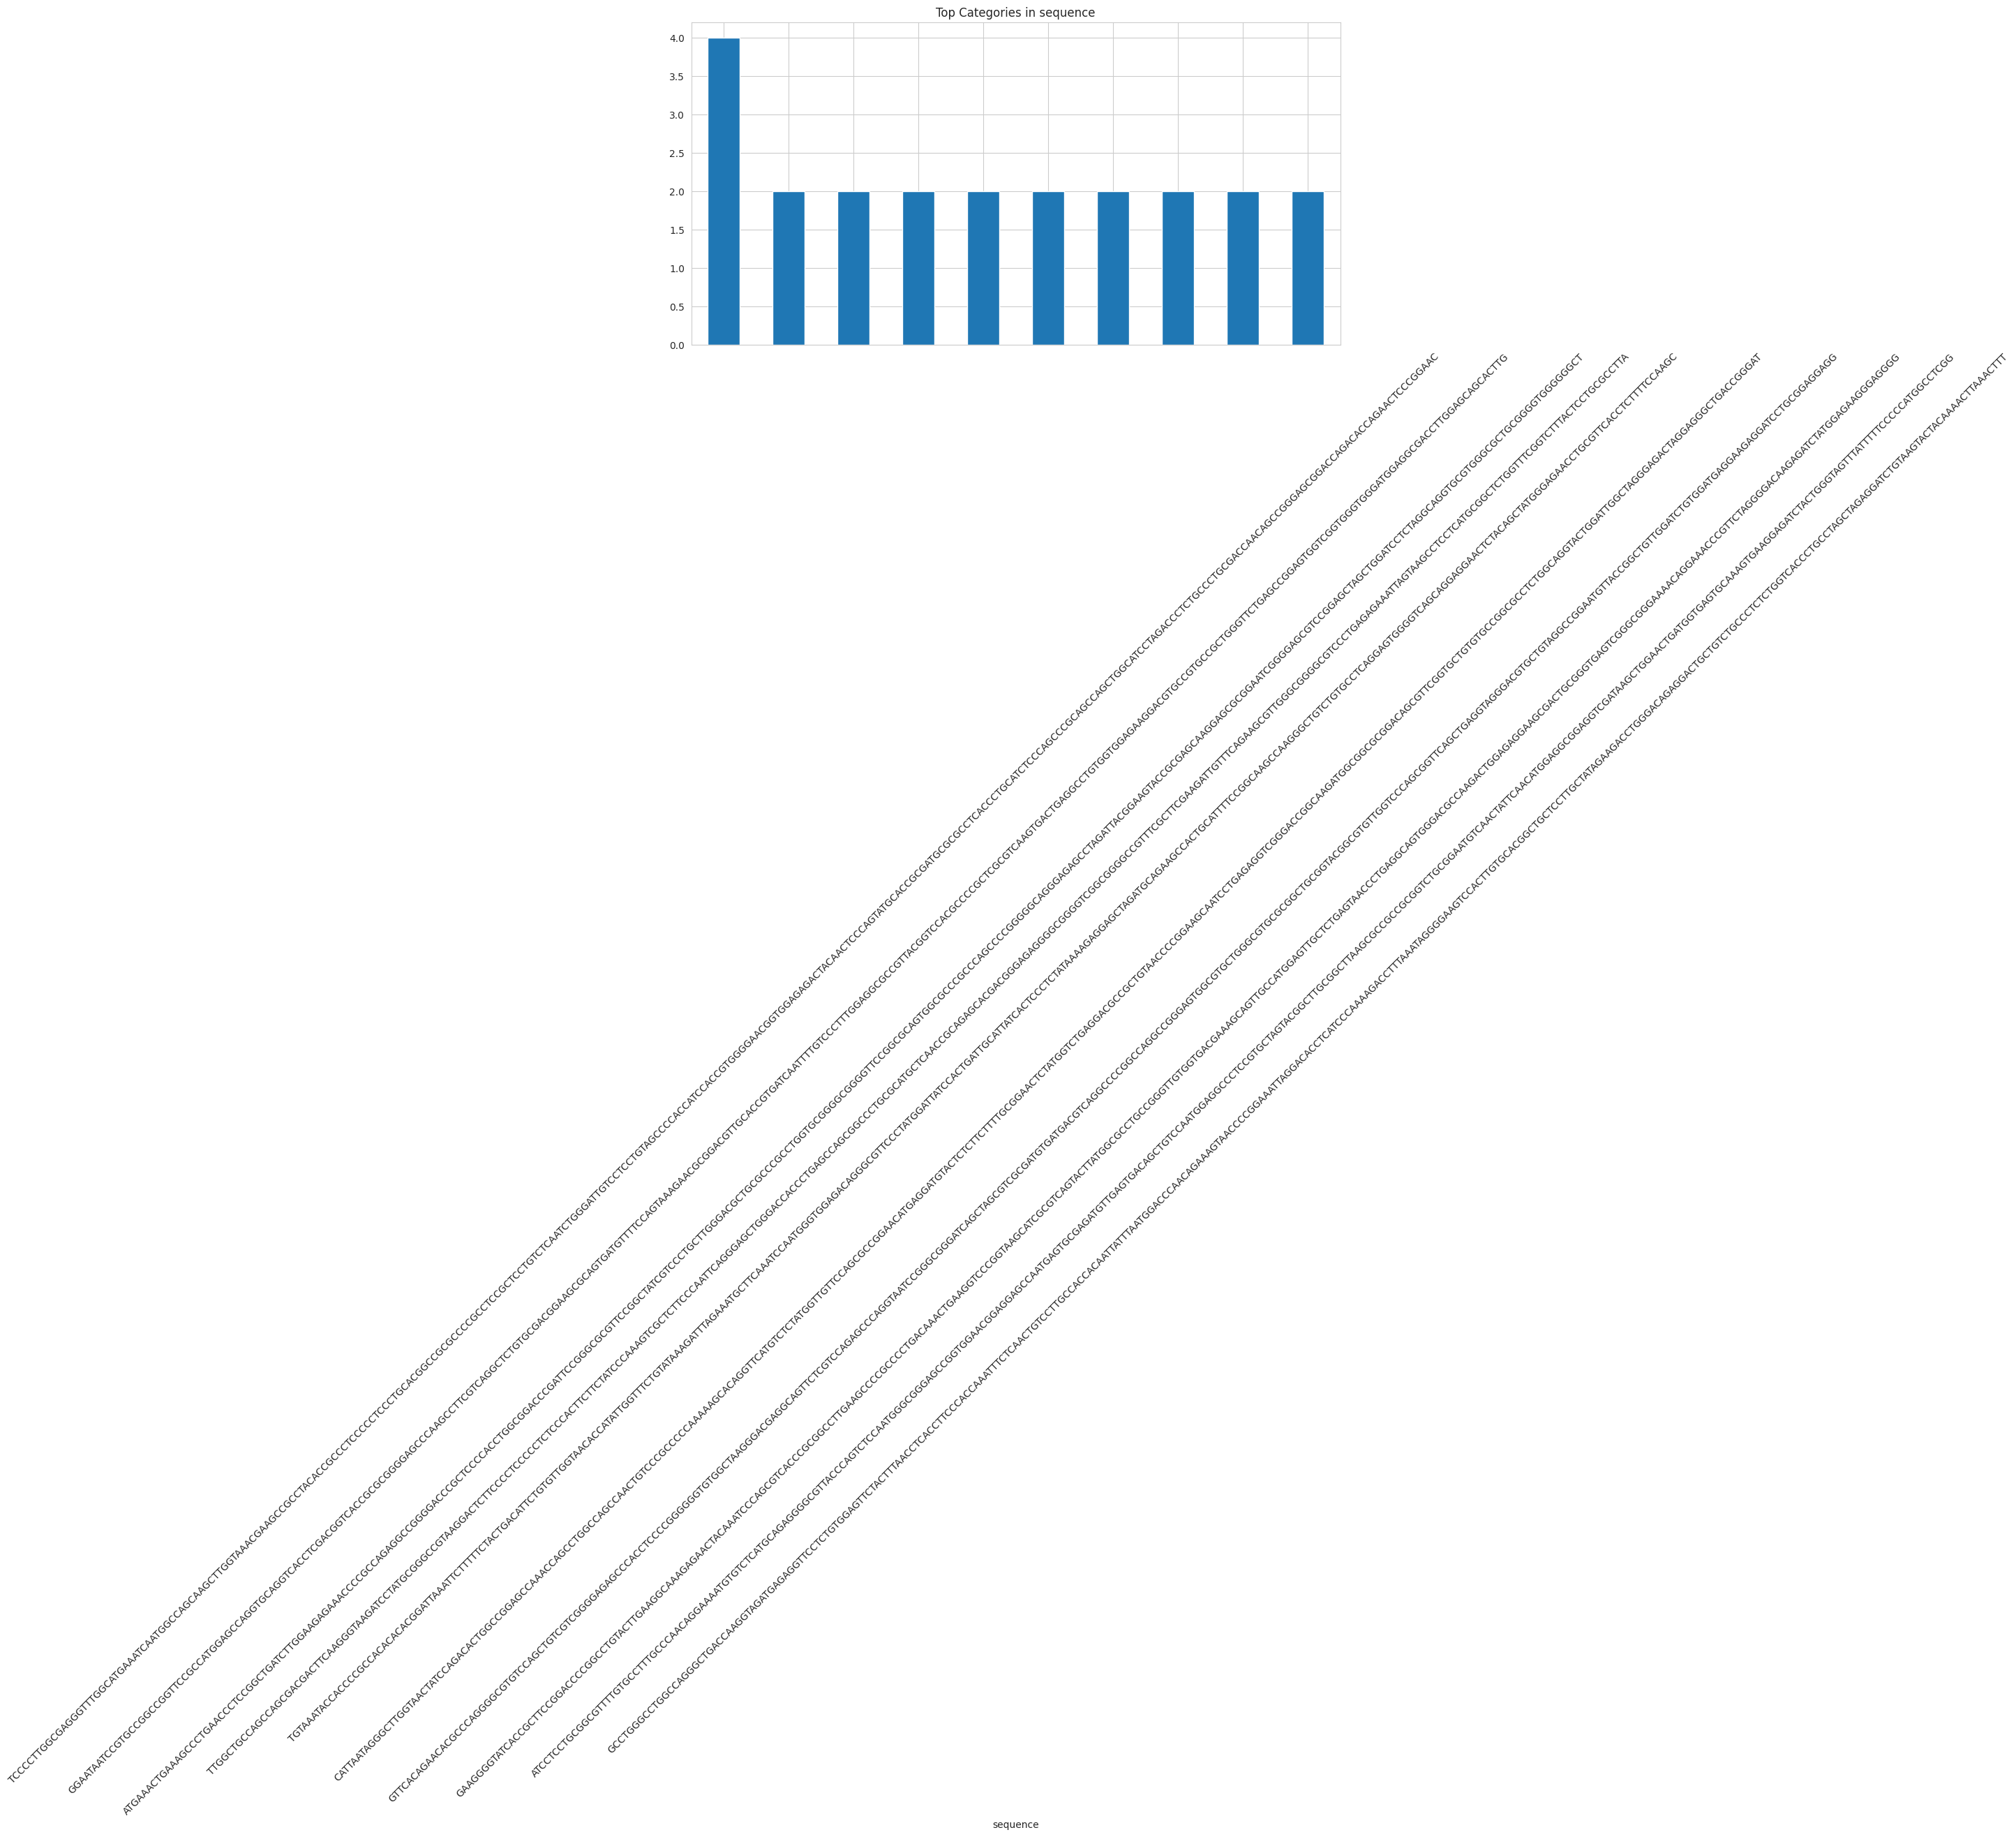

In [6]:
# Univariate Analysis (Single Variables)
print("\n📈 Distribution of Numeric Features:")
numeric_cols = df.select_dtypes(include=np.number).columns

# Plot histograms for all numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

print("\n Count of Categorical Values:")
categorical_cols = df.select_dtypes(include='object').columns

# Plot value counts for top categories
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')  # Top 10 only
    plt.title(f"Top Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()


🤝 Relationships Between Numeric Features:


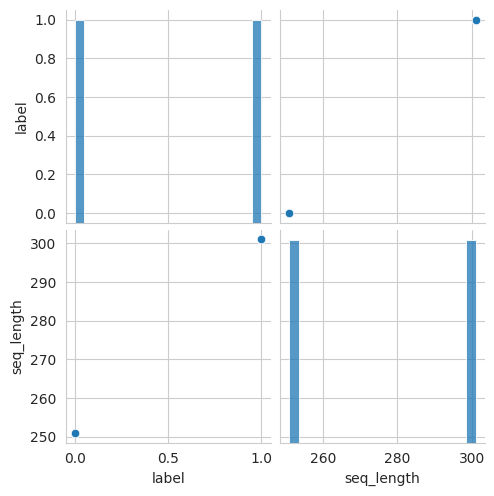

In [7]:
# 6️⃣ Relationships Analysis (Bivariate)
print("\n🤝 Relationships Between Numeric Features:")
# Pairplot for small datasets (<10 numeric columns)
if len(numeric_cols) <= 10:
    sns.pairplot(df[numeric_cols])
    plt.show()
else:
    print("Too many numeric columns for pairplot - try correlation heatmap instead")

    # Correlation heatmap
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Heatmap")
    plt.show()


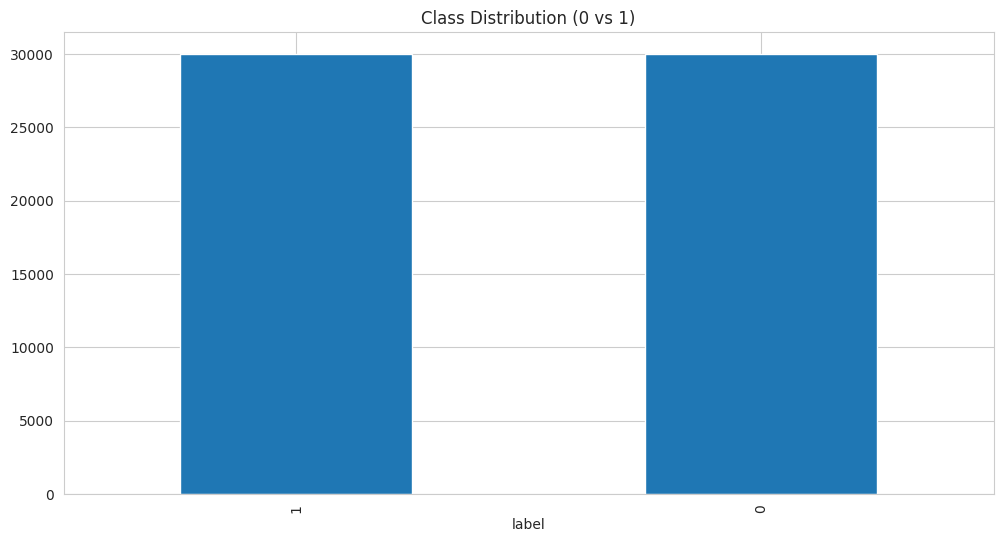

In [8]:
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution (0 vs 1)")
plt.show()

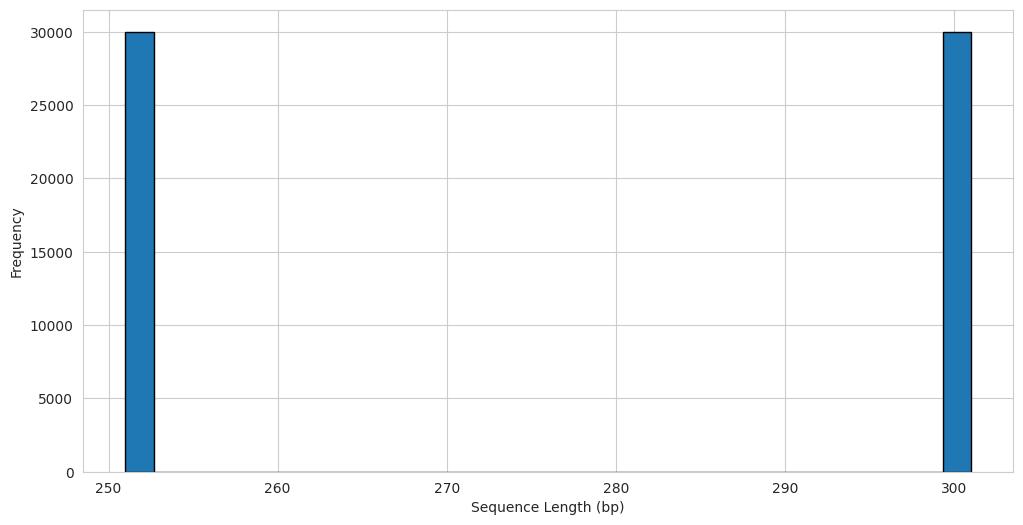

In [9]:
# Plot sequence length distribution
plt.hist(df['seq_length'], bins=30, edgecolor='black')
plt.xlabel("Sequence Length (bp)")
plt.ylabel("Frequency")
plt.show()

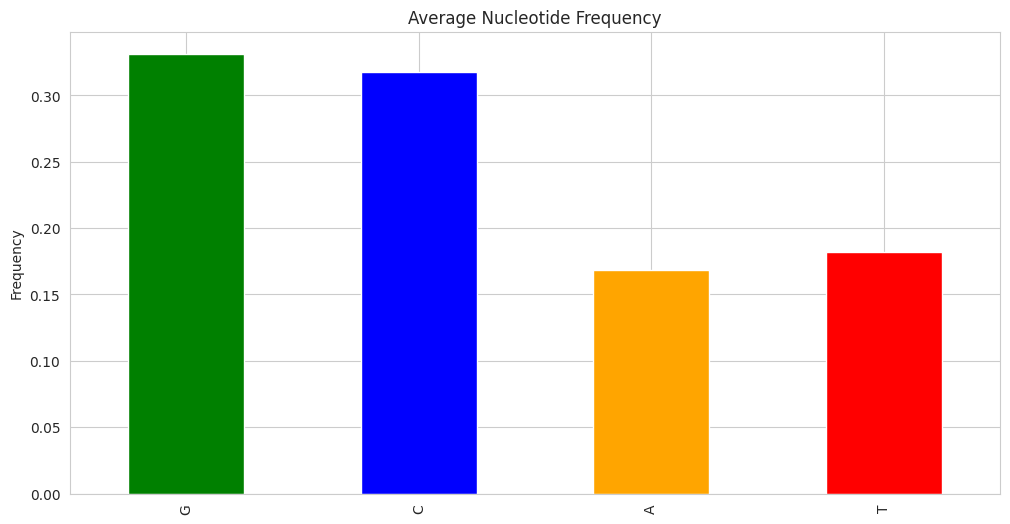

In [10]:
def nucleotide_frequency(seq):
    return pd.Series(list(seq)).value_counts(normalize=True)

# Analyze the first 100 sequences (sampling for speed)
base_freq = df['sequence'].head(100).apply(nucleotide_frequency).mean()
base_freq.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.title("Average Nucleotide Frequency")
plt.ylabel("Frequency")
plt.show()

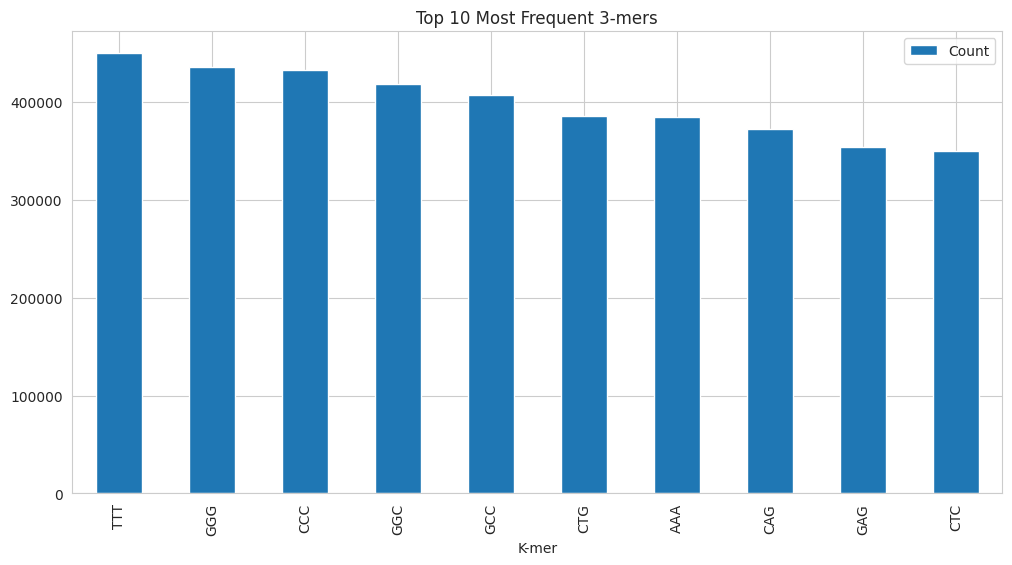

In [11]:
from collections import Counter

k = 3  # Trinucleotides
kmers = df['sequence'].apply(lambda seq: [seq[i:i+k] for i in range(len(seq)-k+1)])
top_kmers = Counter([kmer for sublist in kmers for kmer in sublist]).most_common(10)
pd.DataFrame(top_kmers, columns=['K-mer', 'Count']).plot.bar(x='K-mer', y='Count')
plt.title(f"Top 10 Most Frequent {k}-mers")
plt.show()

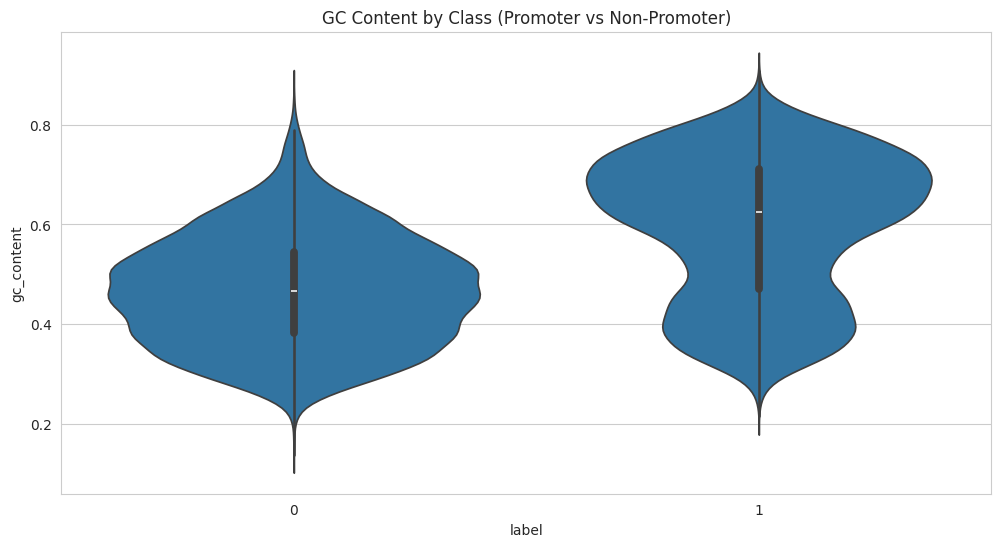

In [12]:
df['gc_content'] = df['sequence'].apply(lambda seq: (seq.count('G') + seq.count('C')) / len(seq))
sns.violinplot(data=df, x='label', y='gc_content')
plt.title("GC Content by Class (Promoter vs Non-Promoter)")
plt.show()

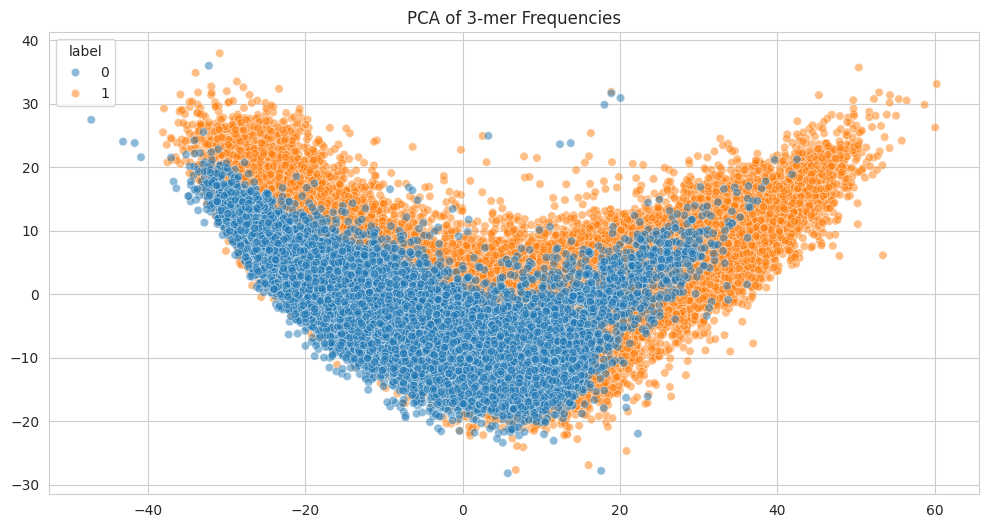

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

kmer_counts = CountVectorizer(analyzer='char', ngram_range=(3, 3)).fit_transform(df['sequence'])
pca = PCA(n_components=2).fit_transform(kmer_counts.toarray())
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=df['label'], alpha=0.5)
plt.title("PCA of 3-mer Frequencies")
plt.show()